# まずreshapeについて
※このメモが書けるcellは「cell」→「cell type」→「Markdown」

マークダウン記法：
https://qiita.com/tbpgr/items/989c6badefff69377da7

In [34]:
import numpy as np
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
print(a.shape)

(3, 4)


In [35]:
# 1行12列の形状にreshape(行列の形の変換)
a.reshape(1,12)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [36]:
# 2行6列の形状にreshapeしたい
a.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [37]:
# reshapeに-1を指定する場合について知っておこう

# 明示的に1行にしたい場合
# (1行なら12列なのは当たり前だから(1,12)と書かなくてよくて省エネ！)
a.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [38]:
# 何行かは計算するのが面倒臭いけど、3列にreshapeしたい！
# 列数だけ指定してreshape ,
# 指定しない行に-1を入れておくと勝手に12÷3=4行を計算しreshapeしてくれる
a.reshape(-1,3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [39]:
# 練習①
# 6行にreshape(列数は指定しない)
a.reshape(6, -1)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [40]:
# 練習②
import numpy as np
b = np.array([[1, 2, 3, 4],
             [5, 6, 7, 8],
             [9, 10, 11, 12],
             [13, 14, 15, 16],
             [17, 18, 19, 20]])

# reshapeに-1を指定して、一行の形に変換しprintで表示しよう
print(b.reshape(-1))

# 列数のみ指定してreshape. 列数:10 
print(b.reshape(-1, 10))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]


# 文字認識　手書き数字を判定しよう

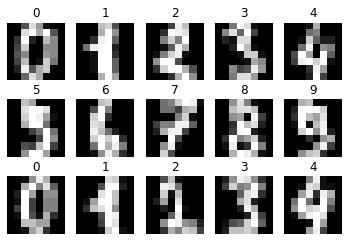

In [41]:
# データを確認してみよう
import matplotlib.pyplot as plt

# 手書きデータを読み込む
from sklearn import datasets
digits = datasets.load_digits()

# 15連続で出力する
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
#     数字データの正解値
    plt.title(str(digits.target[i]))
#     数字データ
    plt.imshow(digits.images[i], cmap='gray')

plt.show()

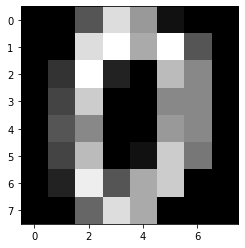

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [42]:
d0 =digits.images[0]
plt.imshow(d0,cmap='gray')
plt.show()
print(d0)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# データを読み込む
digits = datasets.load_digits()
x = digits.images
y = digits.target
# 二次元配列を一次元配列に変換
x = x.reshape((-1, 64))

# データを学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# データを学習
clf = svm.SVC()
clf.fit(x_train, y_train)

# 予測して精度を確認する
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9944444444444445


In [44]:
# 学習済みデータを「digits.pkl」という名前で保存する
# with openのオプション
# ‘w’ : 書き込み用で開きます。ファイル名に設定したものがすでに存在している場合はそのファイルに上書きします。
# ‘r’ : 読み込み用で開きます。
# ‘x’ : 新規ファイルの書き込みとして使います。既存に存在している場合はエラーとなる。
# ‘a’ : 書き込み用で開きます。既存に存在している場合は末行に追加していく。
# ‘b’ : バイナリモードで開きます。
with open ('digits.pkl', 'wb') as fp:
    pickle.dump(clf, fp)

# ペイントソフトで手書きの数字データを作成しよう
ペイント起動→手書きで適当に数字を記載→「png」形式でAIFW2フォルダに保存  


元データの配列データ
[[255 255 255   0 207 255 255 255]
 [255 255   0   0 191 255 255 255]
 [255 255 255   0 255 255 255 255]
 [255 255 255   0 255 255 255 255]
 [255 255 255   0 255 255 255 255]
 [255 255 255   0 255 255 255 255]
 [255   0   0   0   0   0 255 255]
 [255 255 255 255 255 255 255 255]]
白黒変換後の配列データ
[[ 0  0  0 15  3  0  0  0]
 [ 0  0 15 15  4  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0 15 15 15 15 15  0  0]
 [ 0  0  0  0  0  0  0  0]]


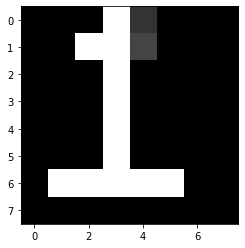

In [62]:
# 読み込んだ手書きデータの読み込み部分ソースコードを実行して、何をやっているのか確認する
import cv2
import matplotlib.pyplot as plt

my_img = cv2.imread('1.png')
# 画像データを学習済みデータに合わせる

# グレースケールに
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)

# 元画像を8*8のサイズにリサイズ
my_img = cv2.resize(my_img, (8, 8))

print('元データの配列データ',my_img,sep='\n')

my_img = 15 - my_img // 16

print('白黒変換後の配列データ',my_img,sep='\n')

plt.imshow(my_img, cmap='gray')
plt.show()

In [65]:
# 自分で用意したデータの画像判定を行うプログラムを実装しましょう
import cv2
import pickle

def predict_digit(filename):
    # 学習済みデータを読み込む
    with open('digits.pkl', 'rb') as fp:
        clf = pickle.load(fp)
    # 自分で用意した手書きの画像ファイルを読み込む
    my_img = cv2
    # 画像データをが奇襲済みデータに合わせる
    my_img = cv2.imread(filename)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 白黒反転する
    # 二次元配列を一次元配列に変換
    my_img = my_img.reshape((-1, 64))
    # データを予測する
    res = clf.predict(my_img)
    return res[0]
    
# 画像ファイルを指定して実行
n = predict_digit("1.png")
print("1.png = " + str(n))
n = predict_digit("2.png")
print("2.png = " + str(n))
n = predict_digit("3.png")
print("3.png = " + str(n))
n = predict_digit("4.png")
print("4.png = " + str(n))
n = predict_digit("5.png")
print("5.png = " + str(n))
n = predict_digit("6.png")
print("6.png = " + str(n))
n = predict_digit("7.png")
print("7.png = " + str(n))
n = predict_digit("8.png")
print("8.png = " + str(n))
n = predict_digit("9.png")
print("9.png = " + str(n))
n = predict_digit("0.png")
print("0.png = " + str(n))

1.png = 5
2.png = 4
3.png = 7
4.png = 4
5.png = 4
6.png = 7
7.png = 4
8.png = 4
9.png = 1
0.png = 7
